In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [4]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Day     3285 non-null   datetime64[ns]
 1   t       3285 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 51.5 KB


In [6]:
new = df.groupby(df['Day'].dt.year).mean()
new = new.sort_values('t').reset_index()

In [7]:
print('самый холодный год: ', new['Day'][0])
print('самый теплый год: ', new['Day'][new.shape[0]-1])

самый холодный год:  2012
самый теплый год:  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [8]:
df[(df['Day'].dt.month == 1) & (df['t'] >= 0)].groupby(df['Day'].dt.year).count().sort_values('t').drop(['Day'], axis=1).idxmax()[0]

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [9]:
df[(df['Day'].dt.month > 5) & (df['Day'].dt.month < 9)].groupby(df['Day'].dt.year).mean().sort_values('t').idxmin()[0]

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [10]:
df['Day'][df['t'].diff(periods=1).abs().idxmax()]

Timestamp('2014-05-27 00:00:00')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

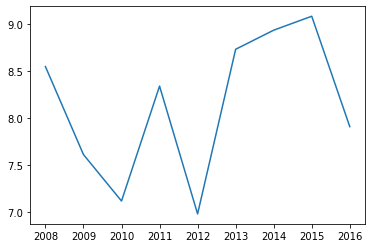

In [11]:
new = df.groupby(df['Day'].dt.year).mean()
t = new['t']
year = df['Day'].dt.year.unique()

plt.plot(year, t)